# Projet Machine learning  

# Objectif :
- Comprendre du mieux possible nos données 
- prédire les prix des voitures d'occasion avec des caractéristiques données en nous référant sur notre target variable **price**

### Analyse de Forme :
- **Variable target :** price
- **Lignes et colonnes :** 8128, 13
- **Types de variables :**
- **Analyse des valeurs manquantes :**

### Analyse de Fond :
- **Visualisation de la target** : 
- **Signification des variables** :
- **Relation features / target** :




## Analyse de la forme des données 

Importer les librairies utilisées

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from utilities import supprimer_unit,binary_transformation

Importer le fichier csv qui contient le dataset des voitures et les features relatives pour chaque voiture

In [2]:
cars = pd.read_csv('data/Car details v3.csv')

Les dimensions et la description de notre dataset :

In [3]:
cars.shape

(8128, 13)

On voit qu'il faut nettoyer les lignes où des null sont présents :

In [4]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

Visualisation des catégories des attributs catégoriels dont certains que l'on transformera :

In [5]:
for col in cars.select_dtypes('object'):
    print(f'{col :-<50} {cars[col].unique()}')
    print('\n')

name---------------------------------------------- ['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']


fuel---------------------------------------------- ['Diesel' 'Petrol' 'LPG' 'CNG']


seller_type--------------------------------------- ['Individual' 'Dealer' 'Trustmark Dealer']


transmission-------------------------------------- ['Manual' 'Automatic']


owner--------------------------------------------- ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']


mileage------------------------------------------- ['23.4 kmpl' '21.14 kmpl' '17.7 kmpl' '23.0 kmpl' '16.1 kmpl' '20.14 kmpl'
 '17.3 km/kg' '23.59 kmpl' '20.0 kmpl' '19.01 kmpl' '17.3 kmpl'
 '19.3 kmpl' nan '18.9 kmpl' '18.15 kmpl' '24.52 kmpl' '19.7 kmpl'
 '22.54 kmpl' '21.0 kmpl' '25.5 kmpl' '26.59 kmpl' '21.5 kmpl' '20.3 kmpl'
 '21.4 k

On visualise la proportion des valeurs dans les attributs catégoriels (outre les valeurs numériques)

In [6]:
print(cars['fuel'].value_counts()/cars.shape[0],'\n')
print(cars['transmission'].value_counts()/cars.shape[0],'\n')
print(cars['owner'].value_counts()/cars.shape[0],'\n')
print(cars['seller_type'].value_counts()/cars.shape[0])

Diesel    0.541585
Petrol    0.446727
CNG       0.007013
LPG       0.004675
Name: fuel, dtype: float64 

Manual       0.870817
Automatic    0.129183
Name: transmission, dtype: float64 

First Owner             0.650714
Second Owner            0.258981
Third Owner             0.068282
Fourth & Above Owner    0.021407
Test Drive Car          0.000615
Name: owner, dtype: float64 

Individual          0.832431
Dealer              0.138533
Trustmark Dealer    0.029035
Name: seller_type, dtype: float64


## Preprocessing

On supprime les null puis on reset les index pour qu'ils s'adaptent

In [7]:
cars = cars.dropna(subset=['mileage', 'max_power', 'torque', 'seats'])
cars = cars.reset_index(drop=True) 
cars


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


On remarque bien qu'il n'y a plus de valeur nulle

In [8]:
cars.isnull().sum() 

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

On supprime les attributs qui nous paraissent inutiles :

In [9]:
cars = cars.drop(['torque','owner'],axis=1)
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,18.5 kmpl,1197 CC,82.85 bhp,5.0
7902,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,16.8 kmpl,1493 CC,110 bhp,5.0
7903,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,19.3 kmpl,1248 CC,73.9 bhp,5.0
7904,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,23.57 kmpl,1396 CC,70 bhp,5.0


Ici nous supprimons les valeurs LPG et CNG pour l'attribut de fuel et Trustmark Dealer pour l'attribut de seller_type car trop minoritaires en proportion (vu plus haut)

In [10]:
cars = cars.drop(cars[cars.fuel == 'LPG'].index)
cars = cars.drop(cars[cars.fuel == 'CNG'].index)
cars = cars.drop(cars[cars.seller_type == 'Trustmark Dealer'].index)

cars = cars.dropna()
cars = cars.reset_index(drop=True) 

for col in ['seller_type','transmission','fuel']:
    print(cars[col].value_counts()/cars.shape[0],'\n')

Individual    0.854147
Dealer        0.145853
Name: seller_type, dtype: float64 

Manual       0.875775
Automatic    0.124225
Name: transmission, dtype: float64 

Diesel    0.562442
Petrol    0.437558
Name: fuel, dtype: float64 



Ici nous utilisons la fonction que nous avons définie dans le fichier utilities.py, supprimer_unit pour ne garder que la valeur numérique des attributs cités

In [11]:
supprimer_unit(cars,'max_power','bhp')

In [12]:
supprimer_unit(cars,'mileage', 'kmpl')

In [13]:
supprimer_unit(cars,'engine', 'CC')

In [14]:
cars = cars.apply(LabelEncoder().fit_transform)
cars

,name,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats
0,1218,20,270,731,0,1,1,320,24,64,2
1,1506,20,217,683,0,1,1,272,47,152,2
2,371,12,89,720,1,1,1,173,46,73,2
3,726,16,126,698,0,1,1,312,35,114,2
4,1259,13,69,683,1,1,1,131,25,106,2
...,...,...,...,...,...,...,...,...,...,...,...
7578,716,19,187,659,1,1,1,194,21,86,2
7579,604,13,72,682,0,1,1,148,43,167,2
7580,1230,15,226,683,0,1,1,212,24,61,2
7581,1591,19,167,167,0,1,1,322,35,52,2


On s'occupe ici du déséquilibre pour l'attribut de transmission

In [15]:
# Equilibrer pour transmission et seller_type

In [16]:
#cars.sort_values(by=['seller_type','transmission'],inplace=True)
#cars.drop(cars.index[2000:7582], axis=0,inplace=True)

In [17]:
for col in ['seller_type','transmission','fuel']:
    print(cars[col].value_counts()/cars.shape[0],'\n')

1    0.854147
0    0.145853
Name: seller_type, dtype: float64 

1    0.875775
0    0.124225
Name: transmission, dtype: float64 

0    0.562442
1    0.437558
Name: fuel, dtype: float64 



## Régressions

## Matrice de correlation  :

<AxesSubplot:>

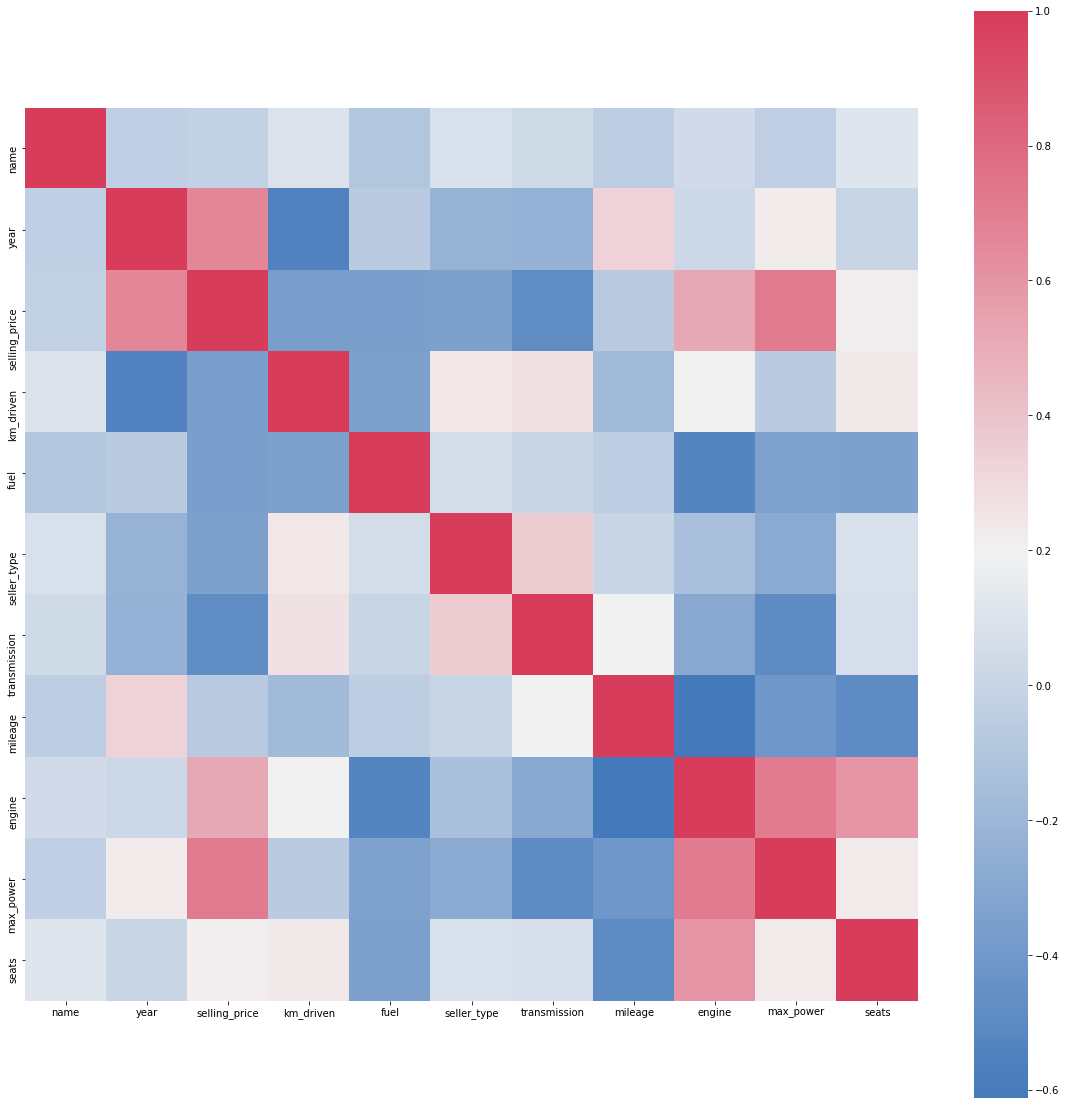

In [18]:
f, ax = plt.subplots(figsize=(20, 20))
corr = cars.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(250, 5, as_cmap=True),
            square=True, ax=ax)

## Division Train / Validation / Test

On supprime tout d'abord les données aberrantes

In [19]:
cars = cars[cars['selling_price']<0.3*pow(10,7)] 

Et on passe à la division

In [20]:
from sklearn.model_selection import train_test_split

X = cars[['year','km_driven','fuel','seller_type','transmission','mileage','engine','max_power','seats']] # on devra traiter les attributs string
y = cars['selling_price'] # variable de prédiction

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=1345) # on stocke dans des valeurs de sortie, random_state pour éviter que ça ne change

## Modèles

Modèle de la régression linéaire, nous avons l'ordonnée à l'origine et les coefficients de l'équation permettant de déterminer le prix d'une voiture. <br>
Nous en avons aussi déduit un taux de variation et un pourcentage de prédictions correctes (entre -20 et 20% de variation) entre le prix attendu et le prix prédit pour chaque ligne du test set.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

mlr = LinearRegression()  
mlr.fit(X_train, y_train)

print("Ordonnée à l'origine : ", mlr.intercept_)
print("Coefficients:")
print(list(zip(X_train, mlr.coef_)) ,'\n')


y_pred_mlr= mlr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_mlr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_mlr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr)))

#Predicted values

#print("Prediction for test set: {}".format(y_pred_mlr))

# compare
mlr_diff = pd.DataFrame({'Prix attendu': y_test, 'Prix prédit': y_pred_mlr, 'Taux de variation' : ((y_pred_mlr-y_test)/y_test)*100})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
display(mlr_diff.head())

mlr_stats = mlr_diff[(mlr_diff['Taux de variation'] < 20) & (mlr_diff['Taux de variation'] > -20)]
print('Pourcentage de prédictions correctes : ',round(len(mlr_stats)/len(mlr_diff),2))

Ordonnée à l'origine :  -112.60482753695186
Coefficients:
[('year', 18.927295897327188), ('km_driven', -0.09613166791559334), ('fuel', -48.722176229750595), ('seller_type', -19.106494404355146), ('transmission', -46.59463395185303), ('mileage', 0.03175016689981182), ('engine', 0.677000310042431), ('max_power', 0.8730224884486987), ('seats', 5.856324103202827)] 

Mean Absolute Error: 53.87841658185705
Mean Squared Error: 4690.550043789289
Root Mean Squared Error: 68.48759043643811


,Prix attendu,Prix prédit,Taux de variation
4882,163,201.012958,23.320833
6889,508,486.974218,-4.138934
489,252,301.954153,19.823076
6698,39,-58.146614,-249.093881
6978,301,334.215560,11.035070


Pourcentage de prédictions correctes :  0.56


In [23]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics
from sklearn.model_selection import train_test_split

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(regressor.score(X_test,y_test))
# accuracy_score(y_test, y_pred) accuracy est pour la classification pas régression

Mean Absolute Error: 29.433853646068943
Mean Squared Error: 1903.4228165874745
Root Mean Squared Error: 43.62823416765197
0.92238564312081


## To-do list

#### _Faire des analyses graphiques !!!_
#### _Garder owner dans les attributs_
#### _Parler de la différence des modèles quand on 